<a href="https://colab.research.google.com/github/cartman12/France-EU-Transporation-Data/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A peek into France's public transportation

In [10]:
from google.colab import files
uploaded = files.upload()

Saving t2020_rk310.tsv to t2020_rk310.tsv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## DataFrame manipulation and cleaning - EU percentage of passengers per transportaion method between 1990 -2016.

In [0]:
df = pd.read_csv('t2020_rk310.tsv', sep='\t|\,', na_values = ': ', engine = 'python') # We have two  spererators, tab and comma, and we converted all ":" to NaN values

df = df.rename(columns=lambda x: x.strip()) # Column headers have whitespace at their right side, we stripping that whitespace

df.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df.columns) ``

cols = list(df.columns[3:]) # Get select the numerical columns only
df = df.astype('str') # Convert df from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df[col] = df[col].str.strip(" e b be r d p")
  df[col] = df[col].replace('nan', np.nan)
  df[col] = df[col].replace(': z', 0)
df['country'] = df['country'].replace('EL', 'GR')
df['country'] = df['country'].replace('UK', 'GB')
df[cols] = df[cols].astype('float') # Convert string to float

In [378]:
countries = pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv') # Load a country code dataset
countries.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [0]:
df = df.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df = df.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns

In [0]:
k = list(df.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df.columns[-1]) # Insert the 'country' column name at index 0 of the list
df = df.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list


In [0]:
# Create a column that depicts the percentgae of change in each method and country from 1990 to 2016.
df['Percentage_of_change'] = abs((df['2016'] - df['1990'])/df['1990'])

In [0]:
df.nlargest(9, ['Percentage_of_change'])  # Filter by the largest 9 percentga eof change

Based on the above table, Turkey seems like an interesting case study, showing a drastic shift from public transportation into private transportation.

In [0]:
df.isnull().sum()

## Ploting a histogram - Comparing the use of cars vs the use of public transportation

In [0]:
def selectcountry(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple', rot = 90)
  ax2.legend(labels = ['Public Transportation (Bus + Train)', 'Cars','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 1 - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

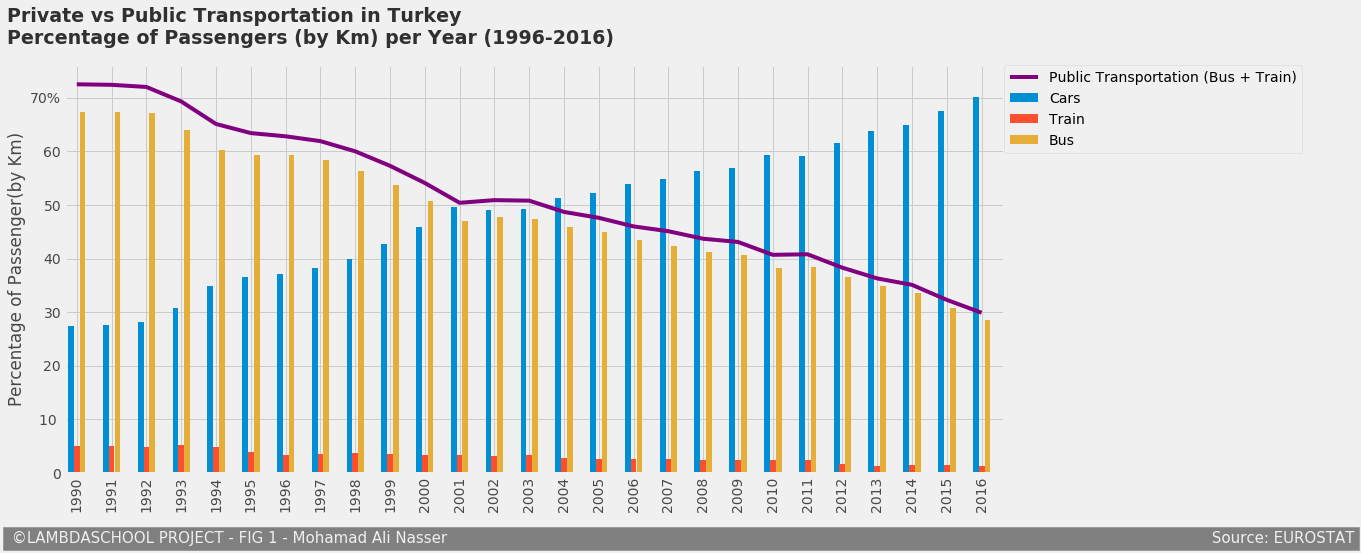

In [477]:
selectcountry(df, 'Turkey')

In [407]:
df.head()

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change,public_transport
0,Austria,PC,BUS_TOT,11,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,11.3,11.2,11.2,11.2,11.3,10.9,10.7,11.1,10.6,10,10.6,10.4,10.4,10.3,10.3,10.2,10.2,0.0727273,NaN
1,Austria,PC,CAR,77.1,77,77,77.2,77.8,77.2,77.4,79,79.4,79.6,79,79.1,79.1,79.3,79.3,79.4,79.3,78.9,78.3,79,78.4,78.3,77.9,77.5,77.6,77.8,77.7,0.0077821,NaN
2,Austria,PC,TRN,11.9,12.4,12.5,12.1,11.6,12,11.9,10.1,9.8,9.6,9.7,9.7,9.7,9.5,9.4,9.8,10,10,11.1,11.1,11,11.3,11.8,12.2,12.1,12,12.1,0.0168067,NaN
3,Belgium,PC,BUS_TOT,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11,10.9,10.8,11,11.7,13,13.2,13.6,13.9,14.1,13,13,12.7,12.8,12.9,11.9,11.4,10.9,10.5,0.00943396,NaN
4,Belgium,PC,CAR,83.3,83.3,83.3,83.3,82.6,82.9,82.9,83,83.1,83.1,83,82.6,81.9,80.5,79.6,79.8,79.2,78.8,79.6,79.5,79.7,79.5,79.3,79.8,80.4,81.2,81.8,0.0180072,NaN


In [0]:
dfT = df.T
dfT = dfT.fillna(method = 'bfill')
df = dfT.T

In [0]:
dfT

In [0]:
cars = df[cols].loc[df['vehicle'] == 'CAR'].T
cars['mean'] = cars.loc[: , :].mean(axis=1)

bus = df[cols].loc[df['vehicle'] == 'BUS_TOT'].T
bus['mean_bus'] = bus.loc[: , :].mean(axis=1)

train = df[cols].loc[df['vehicle'] == 'TRN'].T
train['mean_train'] = train.loc[: , :].mean(axis=1)

public_transport = pd.concat([bus['mean_bus'], train['mean_train']], axis=1, sort=False)

In [0]:
public_transport['total_mean'] = bus['mean_bus'] + train['mean_train']

In [0]:
turkey = df.loc[df['country'] == 'Turkey'] # Select the country
turkey = turkey.T # Transpose the data
turkey.columns = turkey.iloc[2] # Reindex the columns' header
turkey = turkey.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
turkey['public_transport'] = turkey['TRN'] + turkey['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
cars

In [0]:
cols_int = [int(num) for num in cols]
cols_int

In [532]:
public_transport['total_mean']

1990    26.381818
1991    25.836364
1992    25.321212
1993    24.984848
1994    24.469697
1995    24.242424
1996    22.863636
1997    23.184848
1998    22.575758
1999    21.842424
2000    21.945455
2001    21.621212
2002    21.181818
2003    20.781818
2004    20.396970
2005    20.015152
2006    19.681818
2007    19.566667
2008    19.663636
2009    18.633333
2010    18.824242
2011    19.090909
2012    18.775758
2013    18.636364
2014    18.560606
2015    18.451515
2016    18.212121
Name: total_mean, dtype: float64

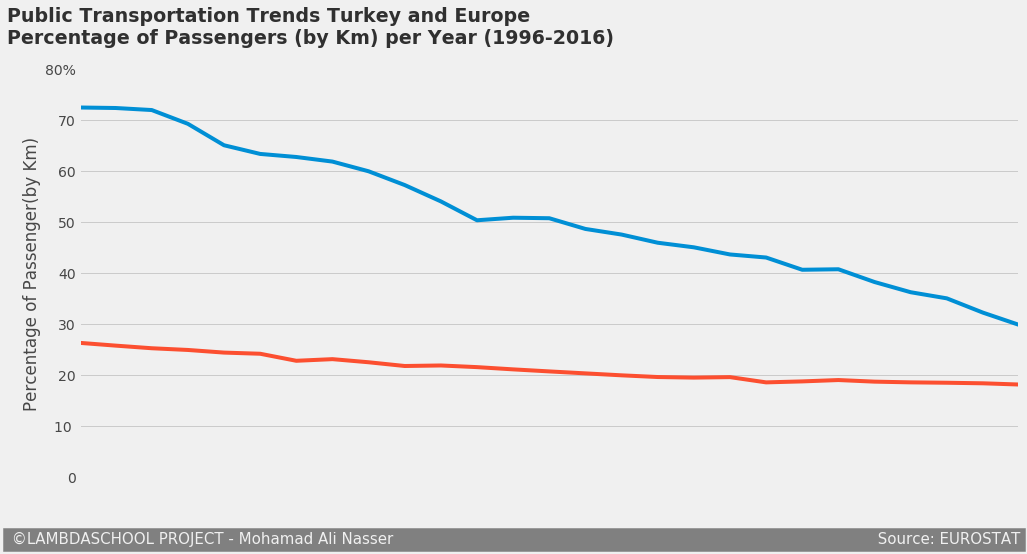

In [544]:
plt.style.use('fivethirtyeight') # choose the 538 style


ax1 = turkey['public_transport'].plot(figsize = (15,7))
ax = public_transport['total_mean'].plot(xticks=[2016])

# Set x and y ticks
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70','80%'], alpha =0.7)
 # Set xlim so that we can add the line
# plt.xticks([int(num) for num in cols])
ax.set_xticklabels(labels = cols, alpha = 0.7)



# Titlem labels and text
plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
ax.text(x = -2, y = 85, s = 'Public Transportation Trends Turkey and Europe \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                      Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

In [0]:
def selectcountry_EU(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple')
  ax3 = public_transport['total_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
  ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Cars','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + ' Compared with EU Public Transportaion Trend \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

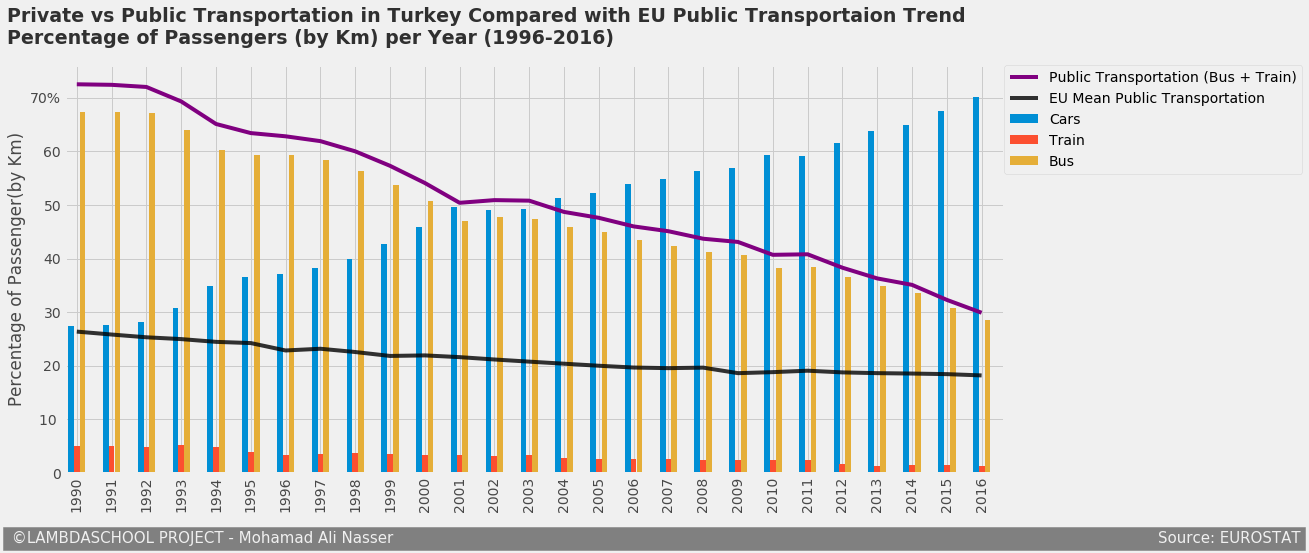

In [479]:
selectcountry_EU(df, 'Turkey')

In [469]:
df = df.loc[df['country'] == country] # Select the country
df = df.T # Transpose the data
df.columns = df.iloc[2] # Reindex the columns' header
df = df.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
df['public_transport'] = name['TRN'] + name['BUS_TOT']
ax2 = name['public_transport'].plot( color = 'purple')
ax3 = public_transport['total_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Train','Bus','Cars'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, a

plt.show()

NameError: ignored

In [0]:
dfT.columns = dfT.iloc[2] # Reindex the columns' header
dfT = dfT.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
dfT['public_transport'] = dfT['TRN'] + dfT['BUS_TOT'] # Create a column consisting of both train and bus

## Loading more data

In [318]:
from google.colab import files
uploaded = files.upload()

Saving ttr00015.tsv to ttr00015 (1).tsv


In [0]:
df2 = pd.read_csv('ttr00001.tsv', sep = '\t|\,', engine ='python')
df2.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df2.columns) ``

cols = list(df2.columns[2:]) # Get select the numerical columns only
df2 = df2.astype('str') # Convert df2 from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df2[col] = df2[col].str.strip(" e b be r d p")
  df2[col] = df2[col].replace('nan', np.nan)
  df2[col] = df2[col].replace(': z', 0)
df2['country'] = df2['country'].replace('EL', 'GR')
df2['country'] = df2['country'].replace('UK', 'GB')
df2[cols] = df2[cols].astype('float') # Convert string to float

In [321]:
df2.head()

,unit,tra_cov,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MIO_PKM,TOTAL,AT,8262,8514,9687,9620,9713,10172,10606,11188,11345,11433,12021,12077
1,MIO_PKM,TOTAL,BE,8964,9403,10139,10237,10498,10498,:,: c,: c,: c,: c,: c
2,MIO_PKM,TOTAL,BG,2411,2404,2317,2138,2090,2059,1870,1821,1698,1549,1455,1434
3,MIO_PKM,TOTAL,CH,:,:,16456,17223,17800,18320,18115,18277,18801,19119,19602,19616
4,MIO_PKM,TOTAL,CY,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z


In [0]:
df2 = df2.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df2 = df2.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns
k = list(df2.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df2.columns[-1]) # Insert the 'country' column name at index 0 of the list
df2 = df2.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list

In [0]:
turkey_gdp = df2.loc[df2['country'] == 'Turkey']

In [270]:
turkey_gdp

,country,unit,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
31,Turkey,I05,100.0,97.9,96.6,98.3,105.5,103.7,99.7,101.0,96.1,94.2,93.6,93.7


In [0]:
df2['Percentage_of_change'] = abs((df2['2016'] - df['2005'])/df['2005'])

In [0]:
def selectcountry2(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data(# Reindex the columns' header
  name = name.drop(['unit', 'country']) # Drop irrelevant rows
   # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

In [0]:
def selectcountry3(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.rename(columns={31 :'gdp_ratio'}, inplace=True)
  name = name.drop(['unit', 'country']) # Drop irrelevan
  

  return name.head()

In [310]:
df2.dtypes

unit        object
country     object
2005        object
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
dtype: object

In [316]:
selectcountry3(df2, 'Turkey')

,gdp_ratio
2005,100
2006,97.9
2007,96.6
2008,98.3
2009,105.5


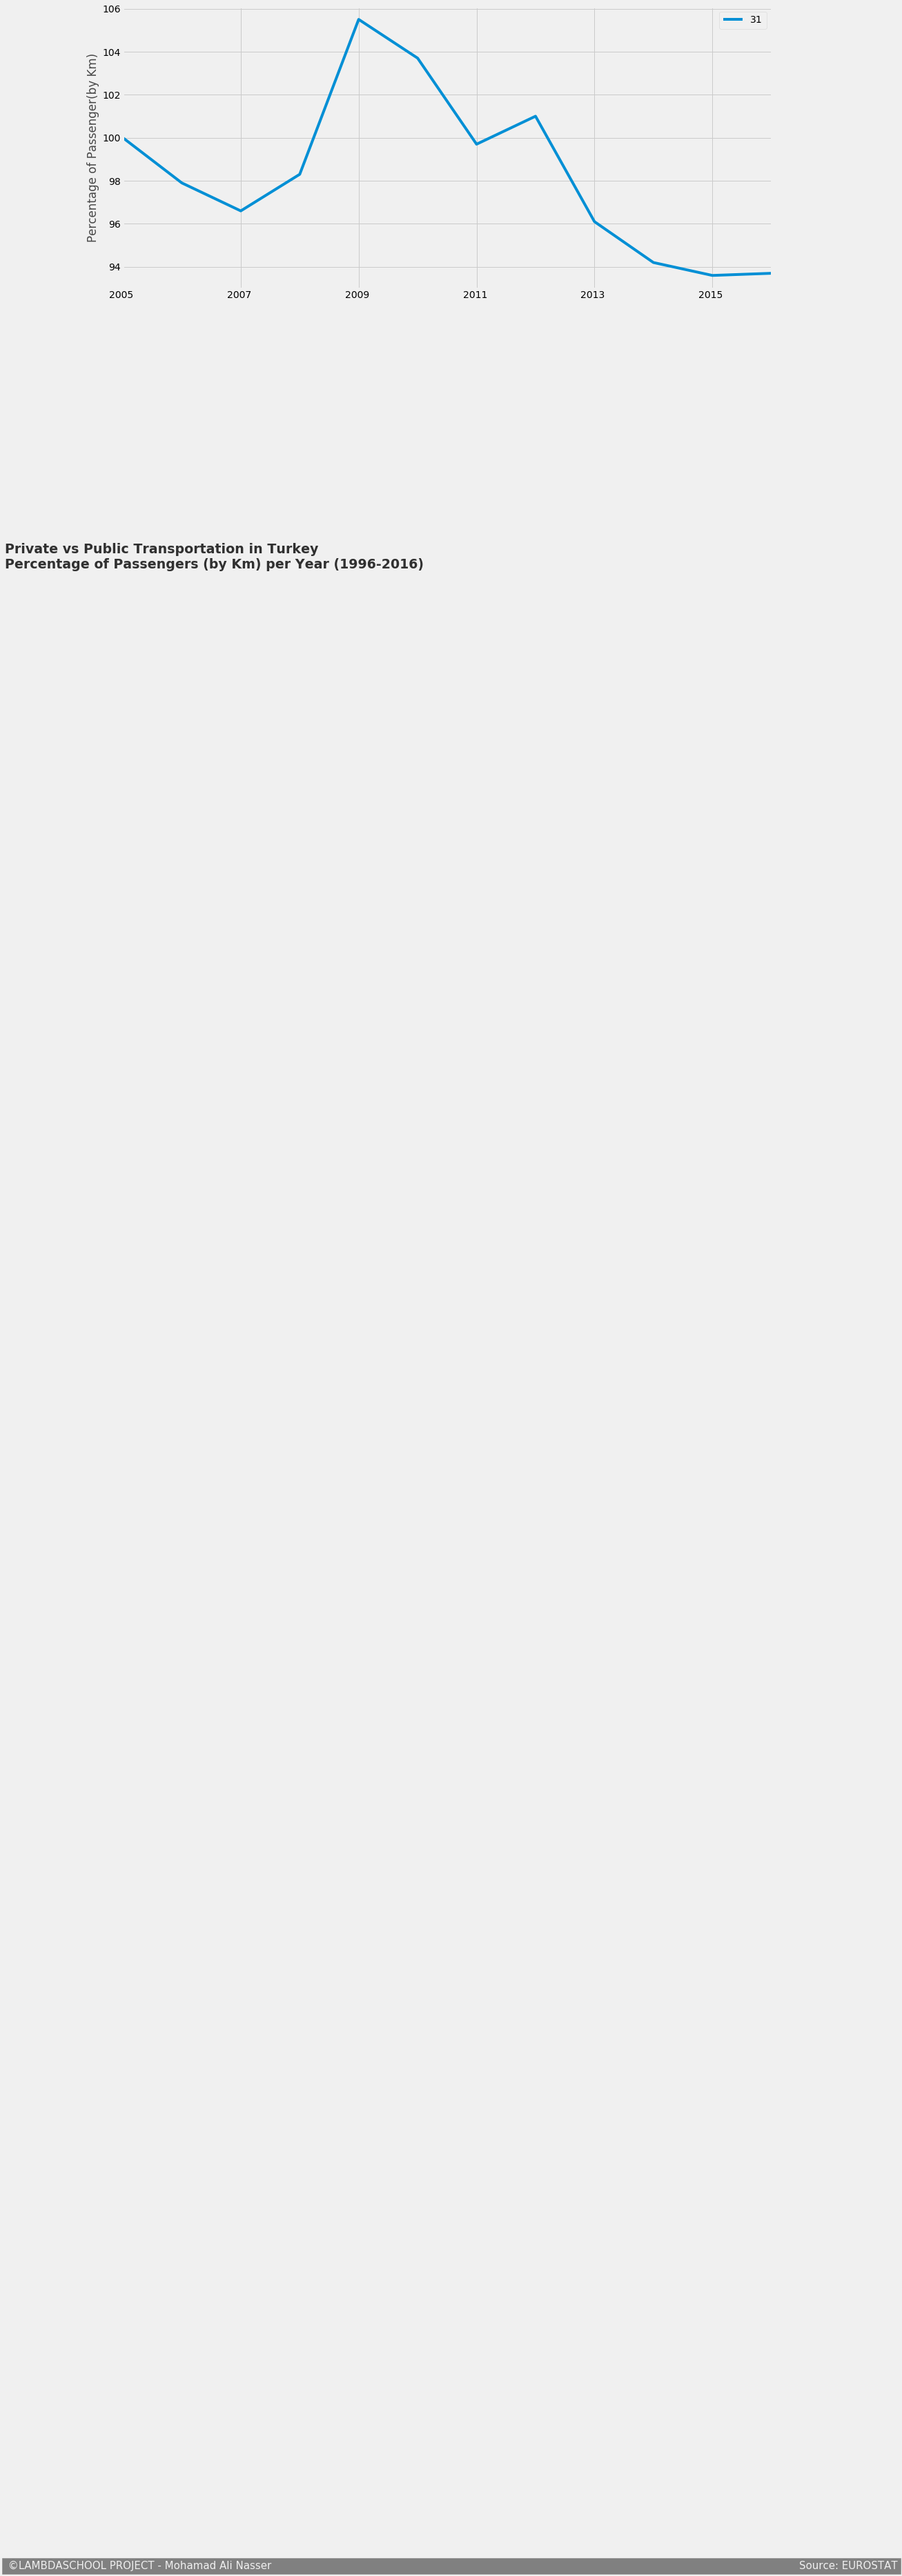

In [317]:
selectcountry2(df2, 'Turkey')

In [0]:

  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)

In [279]:
selectcountry2(df2,'Turkey')

TypeError: ignored